In [263]:
# plot by latitude and longitude 
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [3]:
# load in data
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df_twp_noRF06.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df_twp_noRF06.pkl")

for col in toga_df.columns: 
    print(col) 

Time_UTC
Flight
Notes
Intrument
GGALT
GGLAT
GGLON
Acetaldehyde
n_Butane
i_Butane
Benzene
C3H8
Methanol
Bromoform
Tetrachloroethylene
Dibromomethane
Dichloromethane
Chloroform
Carbon_Tetrachloride


count    211.000000
mean     147.515610
std        5.780674
min      133.000061
25%      144.622231
50%      148.448654
75%      151.761246
max      156.052155
Name: GGLON, dtype: float64

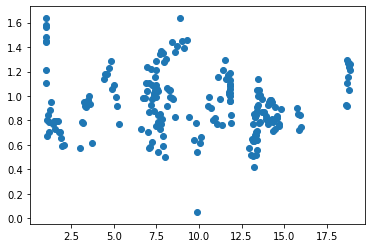

In [5]:
toga_trc = toga_df[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 'Bromoform', \
                    'Benzene', 'Acetaldehyde', 'Dichloromethane', 'Dibromomethane', \
                    'C3H8', 'Chloroform', 'Carbon_Tetrachloride']]
toga_trc_bl = toga_trc[toga_trc['GGALT'] < 2000]
plt.scatter(toga_trc_bl['GGLAT'], toga_trc_bl['Bromoform'])
toga_trc_bl['GGLON'].describe()

In [6]:
#####################################################################################
#####################################################################################
# group by every 2.5 degrees lat 
latlabels = ['0-2.5', '2.5-5.0', '5.0-7.5', '7.5-10.0', \
          '10.0-12.5', '12.5-15.0', '15.0-17.5', '17.5-20.0']
#ticklabels = ['0-2.5', '2.5-5.0', '5.0-7.5', '7.5-10.0', \
#          '10.0-12.5', '12.5-15.0', '15.0-17.5', '17.5-20.0']
latbinedges = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]
toga_trc_bl['lat_bins'] = pd.cut(toga_trc_bl['GGLAT'], latbinedges, labels = latlabels)

# group by every 2.5 degrees lon
lonlabels = ['137.5-140.0', '140.0-142.5', '142.5-145.0', \
          '145.0-147.5', '147.5-150.0', '150.0-152.5', '152.5-155.0']
#ticklabels = ['0-2.5', '2.5-5.0', '5.0-7.5', '7.5-10.0', \
#          '10.0-12.5', '12.5-15.0', '15.0-17.5', '17.5-20.0']
lonbinedges = [137.5, 140, 142.5, 145, 147.5, 150, 152.5, 155]
toga_trc_bl['lon_bins'] = pd.cut(toga_trc_bl['GGLON'], lonbinedges, labels = lonlabels)

/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


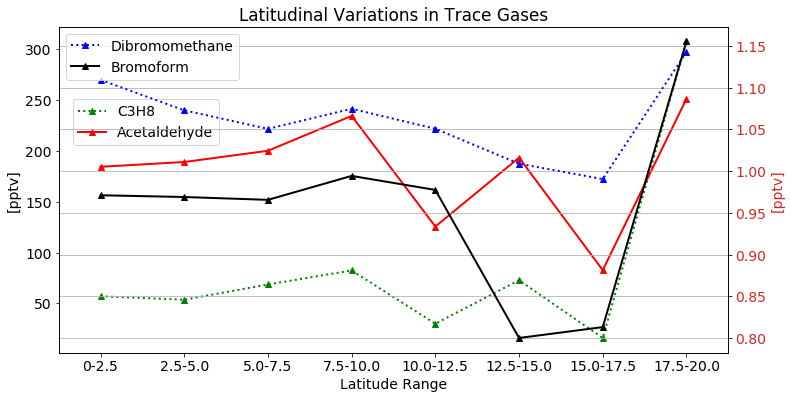

In [40]:
# grouby lat 
gblat = toga_trc_bl.groupby('lat_bins').mean()
gblat['ind'] = np.arange(1, len(gblat)+1)
gblat

# plot 
fig, ax1 = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})

ax1.plot(gblat['ind'], gblat['C3H8'],marker='^',color = 'g',linewidth=2,linestyle=':',label = 'C3H8')
ax1.plot(gblat['ind'], gblat['Acetaldehyde'],marker='^',color = 'r',linewidth=2,linestyle='-',label = 'Acetaldehyde')

ax1.set_xticks(np.arange(1,9))
ax1.set_xticklabels(latlabels)
ax1.set_xlabel('Latitude Range')
ax1.set_ylabel('[pptv]')
ax1.set_title('Latitudinal Variations in Trace Gases')
ax1.set_xlim([0.5, 8.5])
ax1.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

# add second axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('[pptv]', color=color)  # we already handled the x-label with ax1
plt.plot(gblat['ind'], gblat['Dibromomethane'],marker='^',color = 'b',linewidth=2,linestyle=':',label = 'Dibromomethane')
plt.plot(gblat['ind'], gblat['Bromoform'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'Bromoform')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

#plt.plot(gblat['ind'], gblat['Chloroform'],marker='^',color = 'r',linewidth=2,linestyle=':',label = 'Chloroform')

#plt.plot(gblat['ind'], gblat['Benzene'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'Benzene')
#plt.plot(gblat['ind'], gblat['Dichloromethane'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'Dichloromethane')
#plt.plot(gblat['ind'], gblat['Carbon_Tetrachloride'],marker='^',color = 'k',linewidth=2,linestyle=':',label = 'Carbon_Tetrachloride')



plt.grid(which = 'major')
plt.legend()

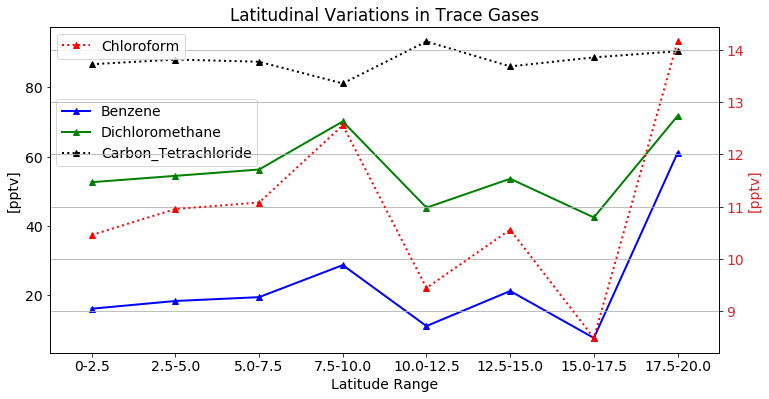

In [35]:
# grouby lat 
gblat = toga_trc_bl.groupby('lat_bins').mean()
gblat['ind'] = np.arange(1, len(gblat)+1)
gblat

# plot 
fig, ax1 = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})
ax1.plot(gblat['ind'], gblat['Benzene'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'Benzene')
ax1.plot(gblat['ind'], gblat['Dichloromethane'],marker='^',color = 'g',linewidth=2,linestyle='-',label = 'Dichloromethane')
ax1.plot(gblat['ind'], gblat['Carbon_Tetrachloride'],marker='^',color = 'k',linewidth=2,linestyle=':',label = 'Carbon_Tetrachloride')

ax1.set_xticks(np.arange(1,9))
ax1.set_xticklabels(latlabels)
ax1.set_xlabel('Latitude Range')
ax1.set_ylabel('[pptv]')
ax1.set_title('Latitudinal Variations in Trace Gases')
ax1.set_xlim([0.5, 8.5])
ax1.legend(loc='upper right', bbox_to_anchor=(0.32, 0.8))

# add second axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('[pptv]', color=color)  # we already handled the x-label with ax1
ax2.plot(gblat['ind'], gblat['Chloroform'],marker='^',color = 'r',linewidth=2,linestyle=':',label = 'Chloroform')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))


plt.grid(which = 'major')
plt.legend()

In [36]:
#####################################################################################
#####################################################################################
gblon = toga_trc_bl.groupby('lon_bins').mean()
gblon['ind'] = np.arange(1, len(gblon)+1)
gblon

,GGALT,GGLAT,GGLON,Bromoform,Benzene,Acetaldehyde,Dichloromethane,Dibromomethane,C3H8,Chloroform,Carbon_Tetrachloride,ind
lon_bins,,,,,,,,,,,,
137.5-140.0,518.095459,9.809365,139.104675,0.588143,17.838572,230.671432,55.767143,1.020571,30.714285,10.107142,86.171425,1
140.0-142.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
142.5-145.0,1270.968506,13.221390,144.570374,0.763000,17.246216,194.048645,52.068825,0.955743,49.270271,9.724054,79.802704,3
145.0-147.5,1158.147583,9.279456,146.976257,1.007889,14.586111,152.694443,48.102222,1.033944,57.166668,9.722222,90.427780,4
147.5-150.0,599.329834,10.300039,148.749756,0.991111,24.434444,164.531113,54.441776,1.098711,102.755554,10.976666,90.455559,5
150.0-152.5,624.958557,5.256531,151.402588,0.953872,18.185640,217.996780,56.160511,1.065462,63.461540,11.116923,86.984612,6
152.5-155.0,391.846649,12.307242,153.737686,0.916733,23.666000,183.843338,54.757332,1.097433,83.833336,11.407000,89.659996,7


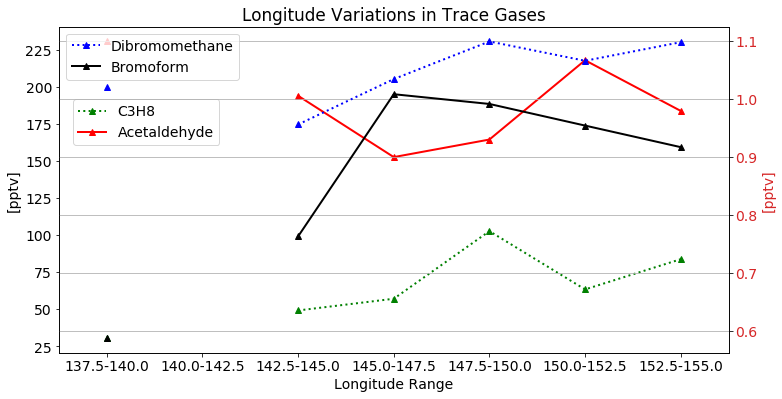

In [43]:
# plot 
fig, ax1 = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})

ax1.plot(gblon['ind'], gblon['C3H8'],marker='^',color = 'g',linewidth=2,linestyle=':',label = 'C3H8')
ax1.plot(gblon['ind'], gblon['Acetaldehyde'],marker='^',color = 'r',linewidth=2,linestyle='-',label = 'Acetaldehyde')

ax1.set_xticks(np.arange(1,8))
ax1.set_xticklabels(lonlabels)
ax1.set_xlabel('Longitude Range')
ax1.set_ylabel('[pptv]')
ax1.set_title('Longitude Variations in Trace Gases')
ax1.set_xlim([0.5, 7.5])
ax1.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

# add second axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('[pptv]', color=color)  # we already handled the x-label with ax1
plt.plot(gblon['ind'], gblon['Dibromomethane'],marker='^',color = 'b',linewidth=2,linestyle=':',label = 'Dibromomethane')
plt.plot(gblon['ind'], gblon['Bromoform'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'Bromoform')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))

#plt.plot(gblat['ind'], gblat['Chloroform'],marker='^',color = 'r',linewidth=2,linestyle=':',label = 'Chloroform')

#plt.plot(gblat['ind'], gblat['Benzene'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'Benzene')
#plt.plot(gblat['ind'], gblat['Dichloromethane'],marker='^',color = 'k',linewidth=2,linestyle='-',label = 'Dichloromethane')
#plt.plot(gblat['ind'], gblat['Carbon_Tetrachloride'],marker='^',color = 'k',linewidth=2,linestyle=':',label = 'Carbon_Tetrachloride')

plt.grid(which = 'major')
plt.legend()

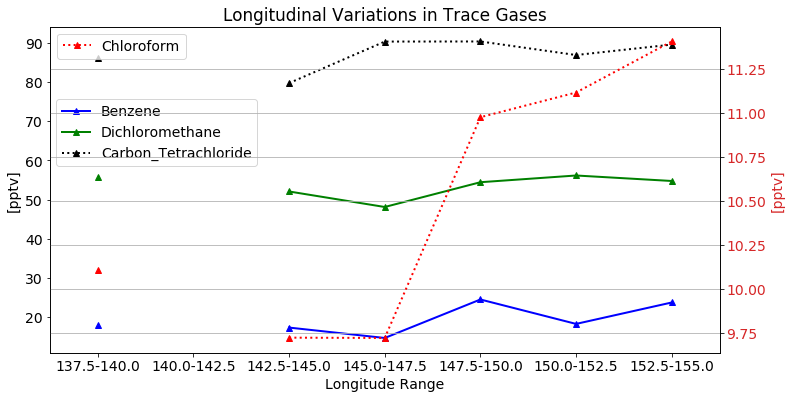

In [42]:
# grouby lat 
gblon = toga_trc_bl.groupby('lon_bins').mean()
gblon['ind'] = np.arange(1, len(gblon)+1)
gblon

# plot 
fig, ax1 = plt.subplots(figsize = [12, 6])
plt.rcParams.update({'font.size': 14})
ax1.plot(gblon['ind'], gblon['Benzene'],marker='^',color = 'b',linewidth=2,linestyle='-',label = 'Benzene')
ax1.plot(gblon['ind'], gblon['Dichloromethane'],marker='^',color = 'g',linewidth=2,linestyle='-',label = 'Dichloromethane')
ax1.plot(gblon['ind'], gblon['Carbon_Tetrachloride'],marker='^',color = 'k',linewidth=2,linestyle=':',label = 'Carbon_Tetrachloride')

ax1.set_xticks(np.arange(1,8))
ax1.set_xticklabels(lonlabels)
ax1.set_xlabel('Longitude Range')
ax1.set_ylabel('[pptv]')
ax1.set_title('Longitudinal Variations in Trace Gases')
ax1.set_xlim([0.5, 7.5])
ax1.legend(loc='upper right', bbox_to_anchor=(0.32, 0.8))

# add second axes
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('[pptv]', color=color)  # we already handled the x-label with ax1
ax2.plot(gblon['ind'], gblon['Chloroform'],marker='^',color = 'r',linewidth=2,linestyle=':',label = 'Chloroform')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(0.25, 0.8))


plt.grid(which = 'major')
plt.legend()